## CREDIT CARD DEFAULT ANAYLIS


In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = False
mpl.rcParams['axes.formatter.limits'] = (-9999, 9999)

In [294]:


df = pd.read_csv("creditcard.csv")



In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [296]:
#renaming all columns

df.columns = df.iloc[0]    
df = df[1:]                
df = df.reset_index(drop=True)  





In [297]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#renamed so that all the columns have meaning full names instead of names like variables


In [298]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

## checking if categorical values have invalid data types that are not listed in the datasets

In [299]:
cols=['SEX','EDUCATION','MARRIAGE','default payment next month']
for i in cols :
    print(df[i].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [300]:
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_cols].value_counts()

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      0      0      0      0      0        9821
-2     -2     -2     -2     -2     -2       2109
-1     -1     -1     -1     -1     -1       1992
1      -2     -2     -2     -2     -2        651
2      2      2      2      2      2         530
                                            ... 
5      4      4      3      2      2           1
       6      5      4      3      2           1
6      5      4      4      3      2           1
3      5      4      3      2      0           1
4      3      2      -1     -1     -1          1
Name: count, Length: 1106, dtype: int64

## converting all invalid data types to valid ones

In [301]:
pd.to_numeric(df['EDUCATION'])

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

In [302]:
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'], errors='coerce')
df['EDUCATION'] = df['EDUCATION'].replace({5: 4, 6: 4,0:4})


In [303]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [304]:
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'], errors='coerce')
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

In [305]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [306]:
df = df.rename(columns={'PAY_0': 'PAY_1'})


In [307]:
pay_cols = ['PAY_1' ,'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_cols] = df[pay_cols].apply(pd.to_numeric, errors='coerce')
df[pay_cols]=df[pay_cols].replace({-2:0,-1:0})

In [308]:
df[pay_cols].value_counts()

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      0      0      0      0      0        19931
1      0      0      0      0      0         1666
2      0      0      0      0      0          703
0      0      2      0      0      0          650
1      2      0      0      0      0          626
                                            ...  
4      3      4      4      4      3            1
              3      3      2      2            1
                     2      3      2            1
0      0      0      0      3      3            1
4      4      4      5      4      3            1
Name: count, Length: 402, dtype: int64

In [309]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column]


## detecting outliers and finding context of those outliers by taking the mean median and mode of those outliers

In [310]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [311]:
df.drop(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
         'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1).describe()


,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [312]:
numeric_cols = ['LIMIT_BAL', 'AGE',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers =[]
    for i in df[col]: 
        if(i< lower or i > upper):
            outliers.append(i)
    print(f'outlier% of {col} = ',len(outliers)/len(df[col])*100,'\n')
    
    print(f"{col} max ",max(outliers),'\n')
    
    print(f"{col} min ",min(outliers),'\n')
    
    print(f"{col} mean ",statistics.mean(outliers),'\n', '\n')
    
       
   


outlier% of LIMIT_BAL =  0.5566666666666666 

LIMIT_BAL max  1000000 

LIMIT_BAL min  530000 

LIMIT_BAL mean  617844.3113772455 
 

outlier% of AGE =  0.9066666666666667 

AGE max  79 

AGE min  61 

AGE mean  64.47426470588235 
 

outlier% of BILL_AMT1 =  8.0 

BILL_AMT1 max  964511 

BILL_AMT1 min  -165580 

BILL_AMT1 mean  248800.735 
 

outlier% of BILL_AMT2 =  7.983333333333334 

BILL_AMT2 max  983931 

BILL_AMT2 min  155635 

BILL_AMT2 mean  240521.76534446765 
 

outlier% of BILL_AMT3 =  8.23 

BILL_AMT3 max  1664089 

BILL_AMT3 min  -157264 

BILL_AMT3 mean  230007.7772377481 
 

outlier% of BILL_AMT4 =  8.74 

BILL_AMT4 max  891586 

BILL_AMT4 min  -170000 

BILL_AMT4 mean  209410.58276125096 
 

outlier% of BILL_AMT5 =  9.083333333333334 

BILL_AMT5 max  927171 

BILL_AMT5 min  -81334 

BILL_AMT5 mean  194950.56880733944 
 

outlier% of BILL_AMT6 =  8.976666666666667 

BILL_AMT6 max  961664 

BILL_AMT6 min  -339603 

BILL_AMT6 mean  190677.65131823244 
 

outlier% of PAY_AMT

In [313]:
'''for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f"boxplot of {column}")
    plt.show()'''

'for column in df.columns:\n    sns.boxplot(x=df[column])\n    plt.title(f"boxplot of {column}")\n    plt.show()'

#boxplot for visualization of outliers

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [315]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [317]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [318]:
df.duplicated().sum()

np.int64(0)

## Univariate anaylsis

Analysis of Quantitative data

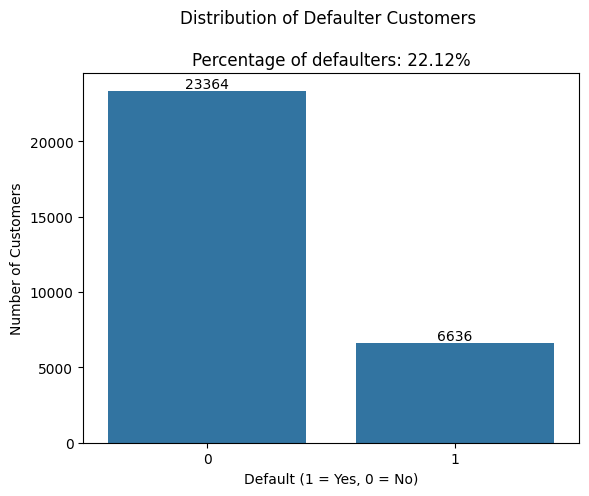

In [319]:



a, b = df['default payment next month'].value_counts()


ax = sns.countplot(data=df, x='default payment next month')


plt.title(f'''Distribution of Defaulter Customers \n
Percentage of defaulters: {b / (a + b) * 100:.2f}%''')

plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')


ax.bar_label(ax.containers[0])

plt.show()


print()

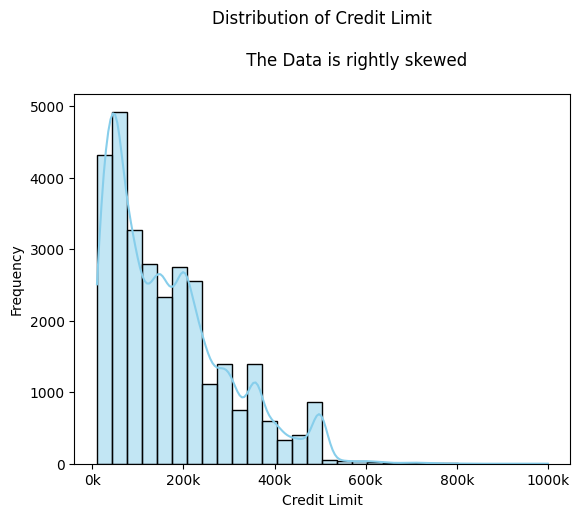

In [320]:
import matplotlib.ticker as mtick
ax=sns.histplot(df['LIMIT_BAL'], kde=True, bins=30, color='skyblue')
plt.title('''Distribution of Credit Limit\n
             The Data is rightly skewed
          ''')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')


plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))


plt.show()


In [321]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

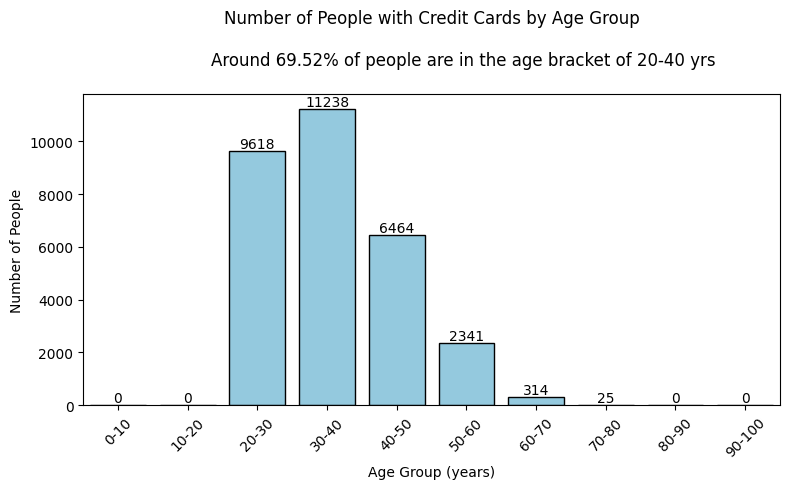

In [323]:
bins = range(0, 101, 10)
labels = [f"{i}-{i+10}" for i in range(0, 100, 10)]
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
age_counts = df['AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(8,5))
ax=sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('''Number of People with Credit Cards by Age Group\n
            Around 69.52% of people are in the age bracket of 20-40 yrs
          ''')
plt.xlabel("Age Group (years)")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


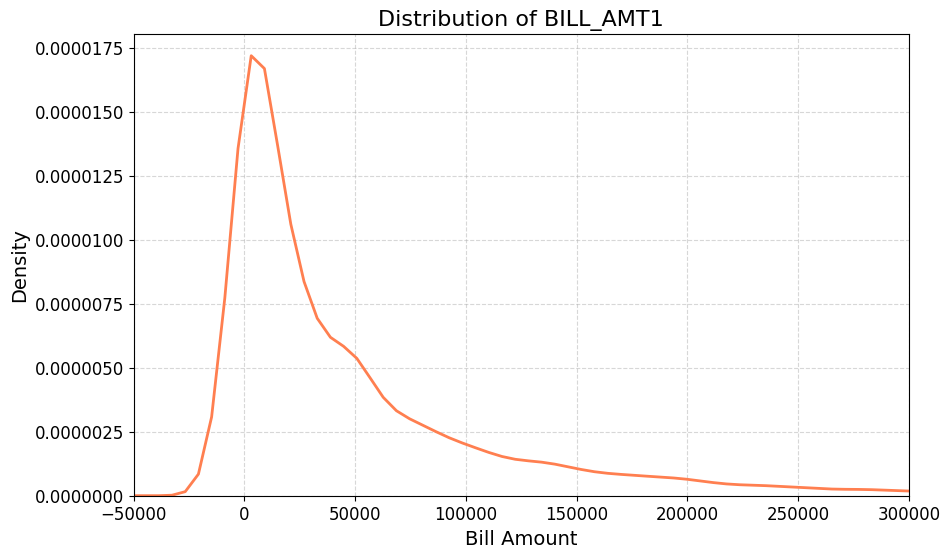

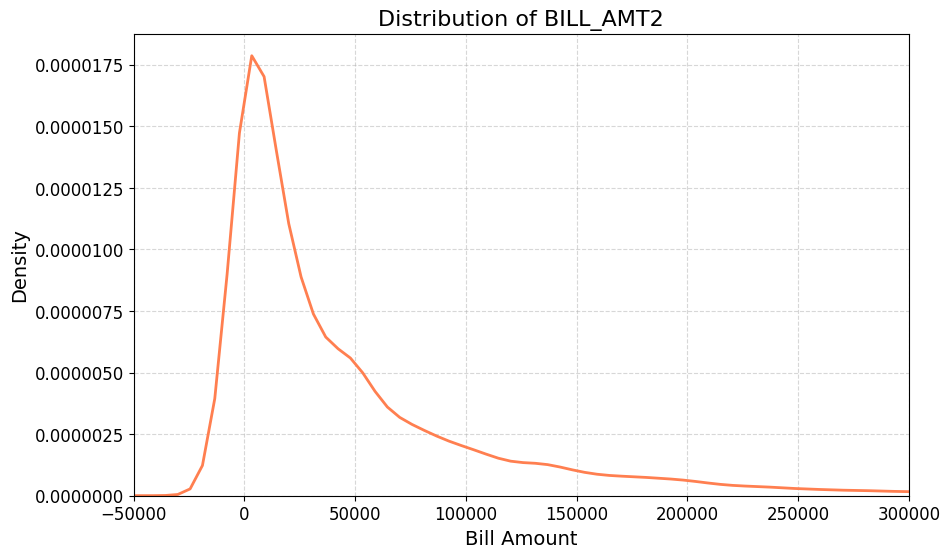

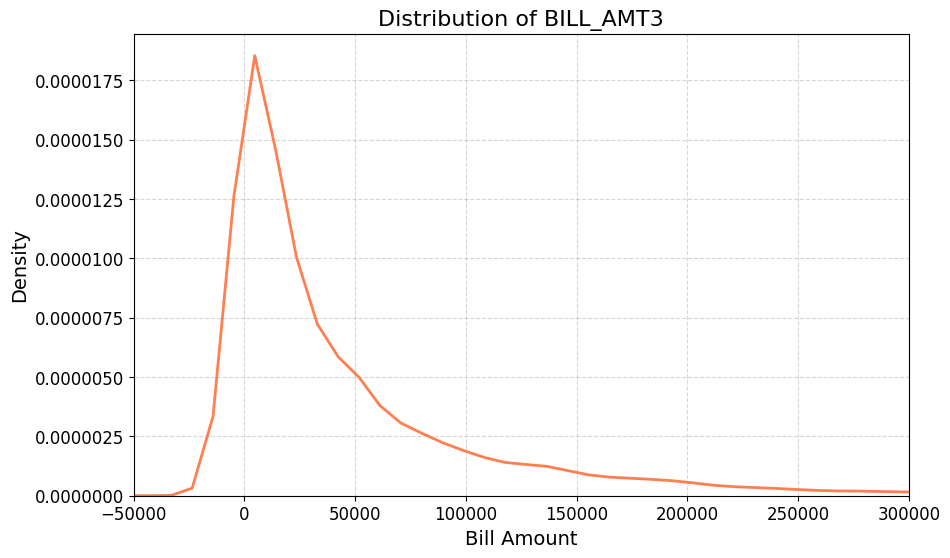

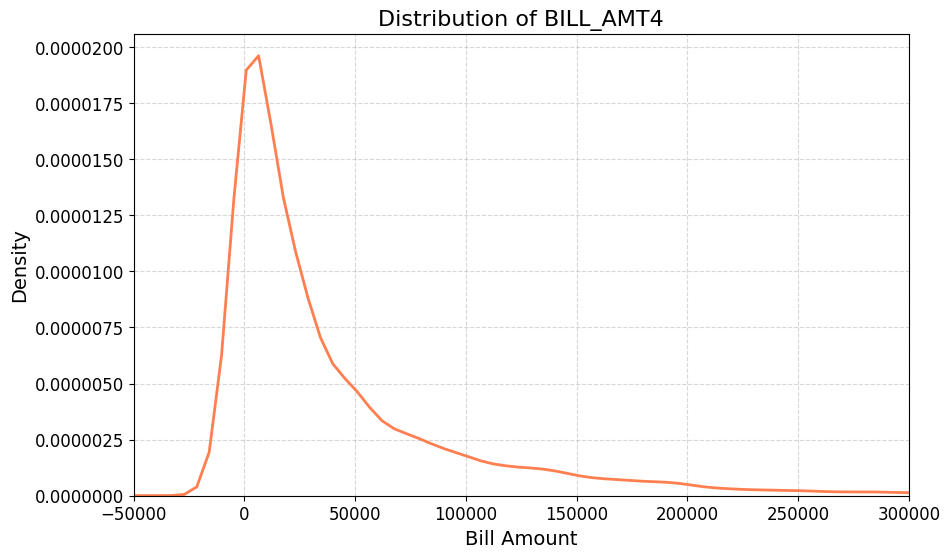

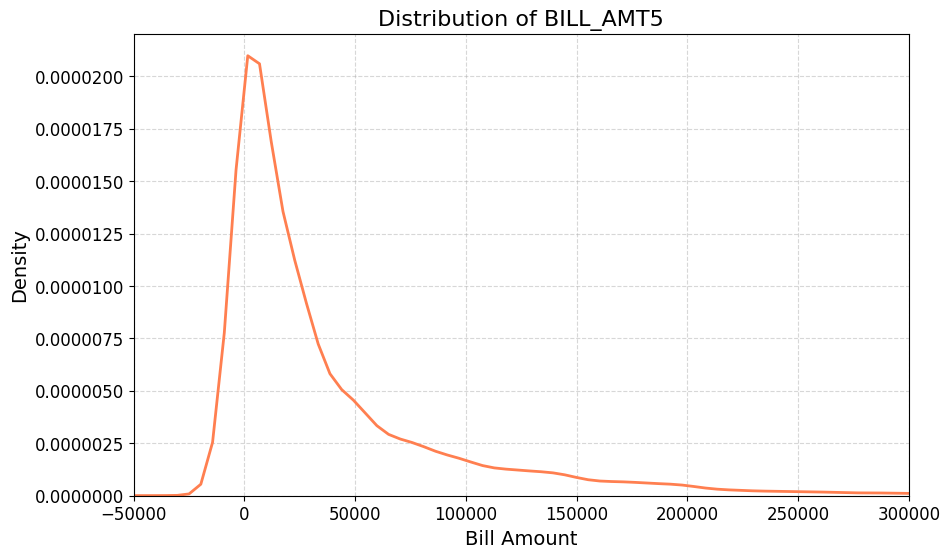

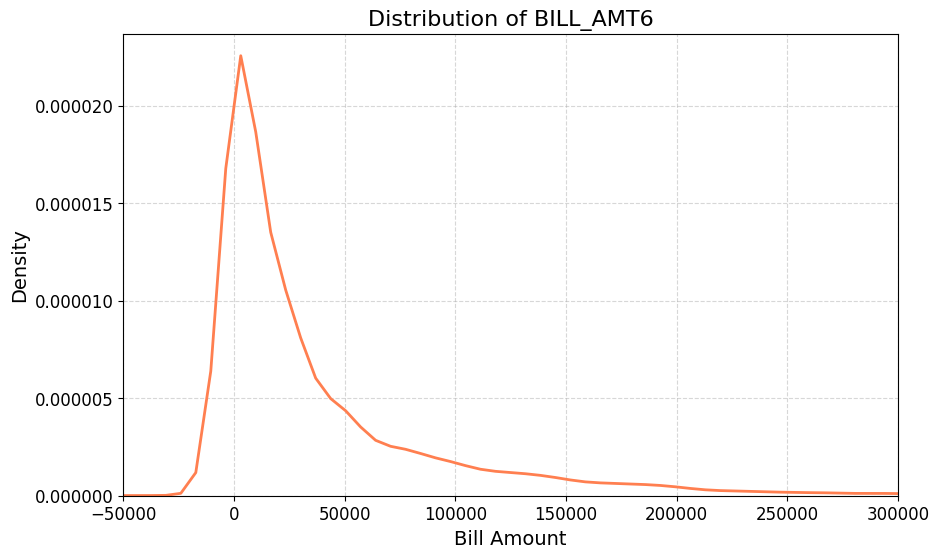

In [324]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for col in bill_cols:
    

    plt.figure(figsize=(10, 6))  # enlarge the figure

    # KDE-style lineplot (smooth curve)
    sns.kdeplot(data=df, x=col, color='coral', fill=False, linewidth=2)

    # Focus on the region where most values lie
    plt.xlim(-50000, 300000)

    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Bill Amount', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    plt.tick_params(axis='both', labelsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


In [325]:
bill_amounts=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i in bill_amounts:
    print(f"description of {i}\n")
    print(df[i].describe(),"\n")

description of BILL_AMT1

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64 

description of BILL_AMT2

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64 

description of BILL_AMT3

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64 

description of BILL_AMT4

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64 

description of BILL_AMT5

count 

bill amount 6 is significantly low than other months


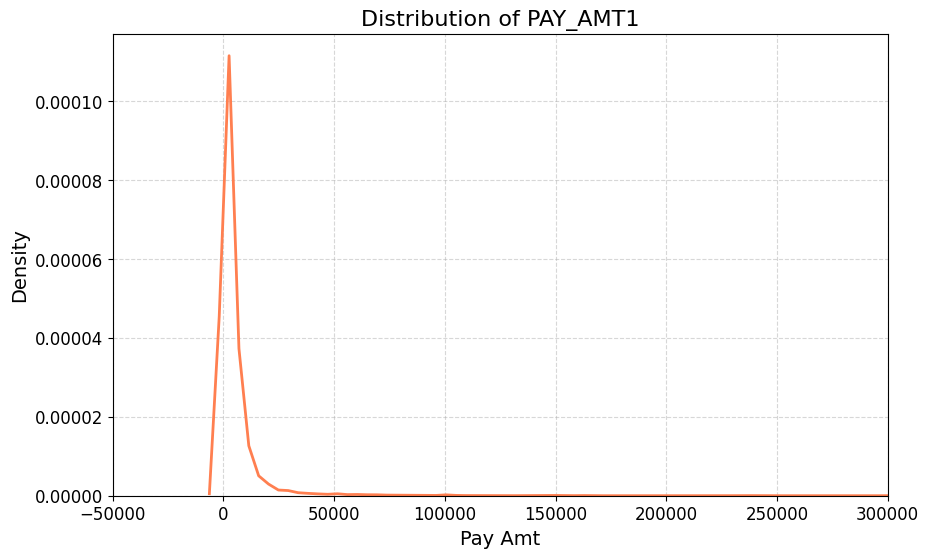

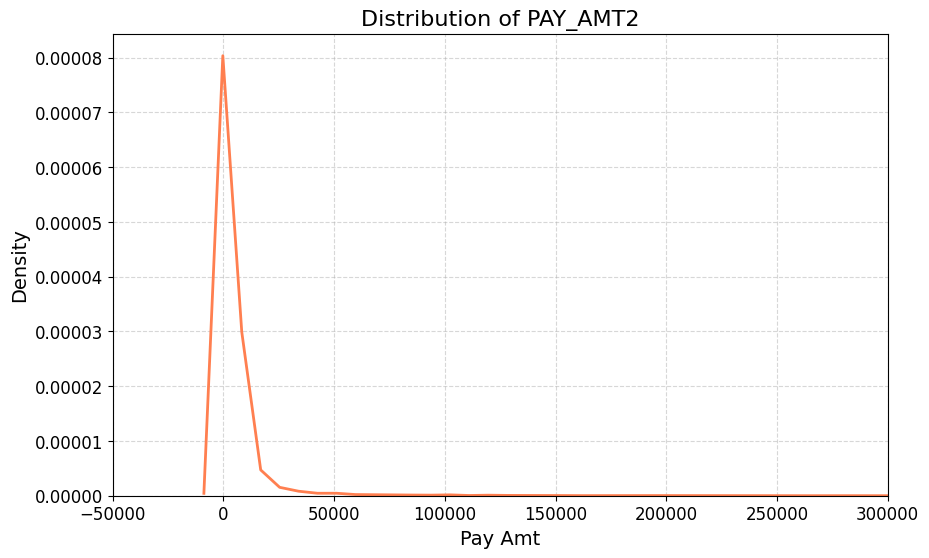

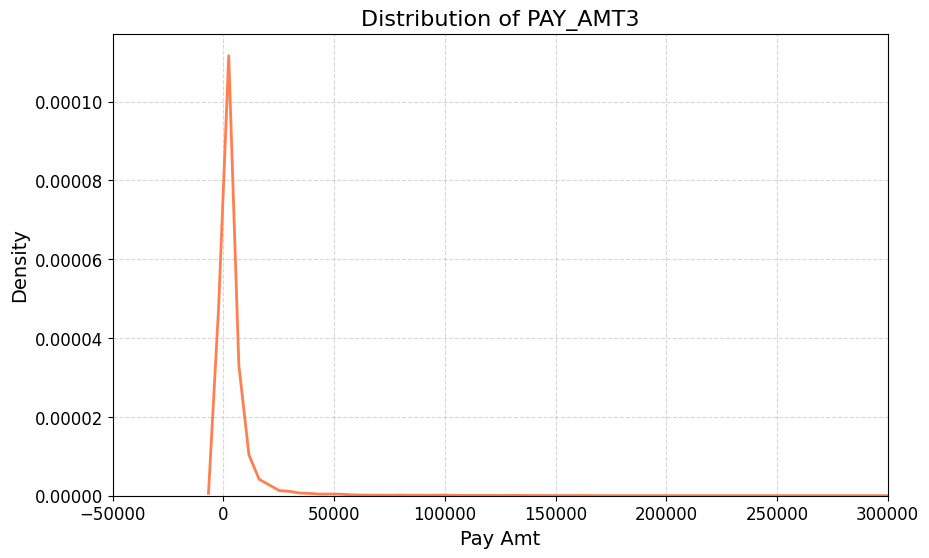

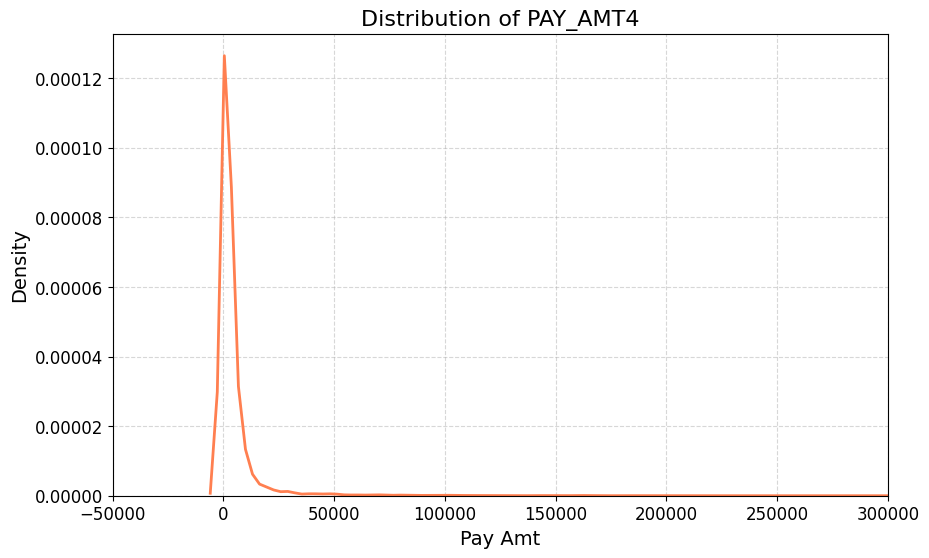

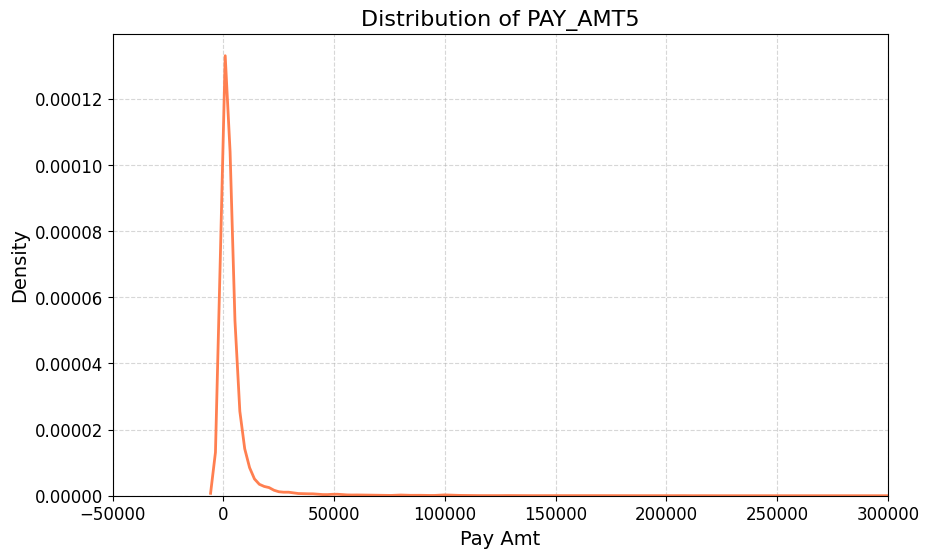

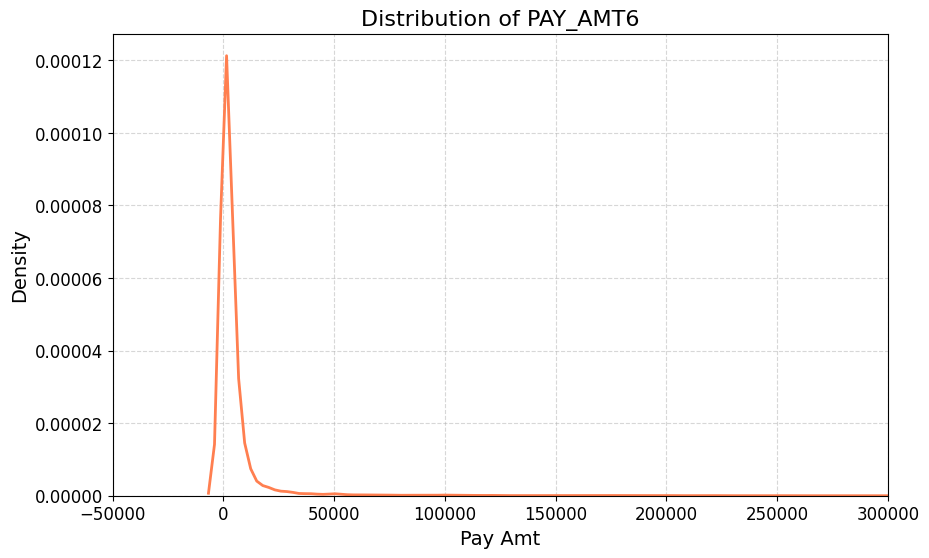

In [326]:
pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in pay_cols:


    plt.figure(figsize=(10, 6))  # enlarge the figure

    # KDE-style lineplot (smooth curve)
    sns.kdeplot(data=df, x=col, color='coral', fill=False, linewidth=2)

    # Focus on the region where most values lie
    plt.xlim(-50000, 300000)

    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Pay Amt', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    plt.tick_params(axis='both', labelsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [327]:
bill_amounts=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in bill_amounts:
    print(f"description of {i}\n")
    print(df[i].describe(),"\n")

description of PAY_AMT1

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64 

description of PAY_AMT2

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64 

description of PAY_AMT3

count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64 

description of PAY_AMT4

count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64 

description of PAY_AMT5

count     30000.000000


The mean bill amount for month 1 is ₹51,223.33, while the mean payment amount is ₹5,663.58.
This indicates that, on average, customers repay only around 11% of their billed amount monthly.
This behaviour if continued may lead to defaulter situation

## Qualitative Analysis

In [328]:
a,b=df['SEX'].value_counts()

[Text(0, 0, '11888'), Text(0, 0, '18112')]

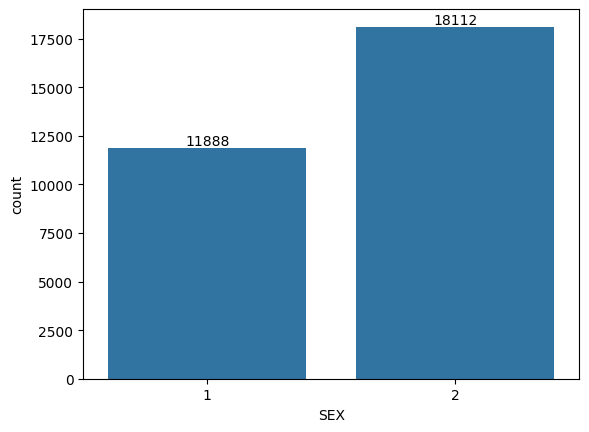

In [329]:
ax=sns.countplot(x='SEX', data=df)
ax.bar_label(ax.containers[0])



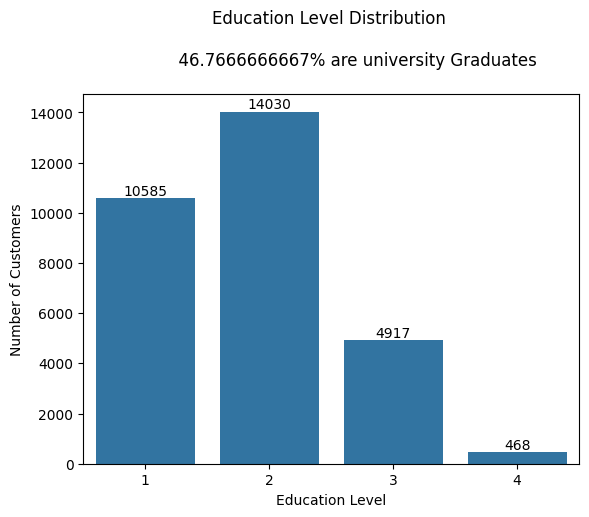

In [330]:

ax=sns.countplot(x='EDUCATION', data=df)
ax.bar_label(ax.containers[0])

plt.title('''Education Level Distribution \n
          46.7666666667% are university Graduates\n ''')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()


In [331]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AGE_GROUP'],
      dtype='object', name=0)

Text(0.5, 0, 'Status')

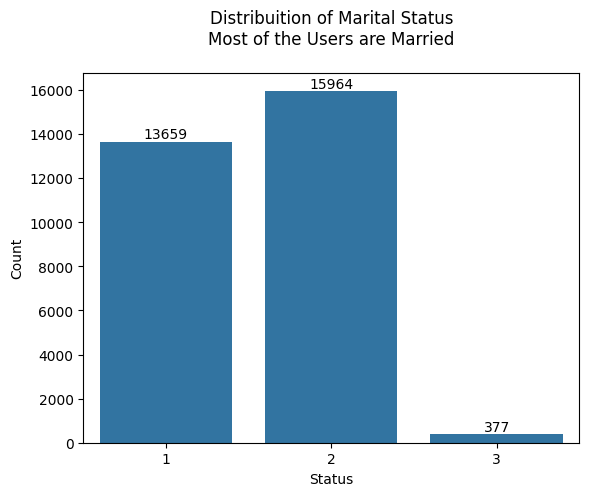

In [332]:
ax=sns.countplot(x='MARRIAGE',data=df)
ax.bar_label(ax.containers[0])

plt.title('Distribuition of Marital Status\n' \
'Most of the Users are Married\n')
plt.ylabel('Count')
plt.xlabel('Status')

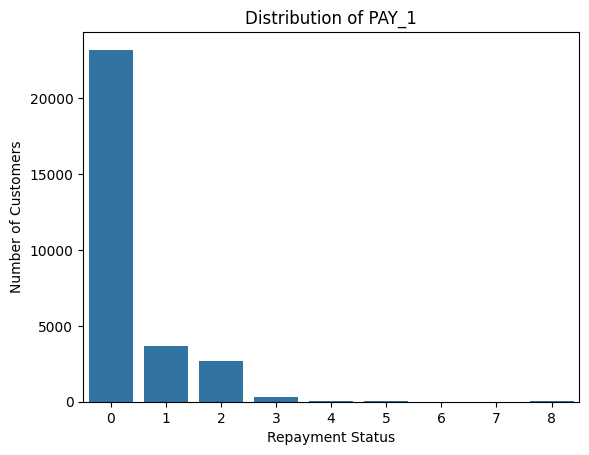

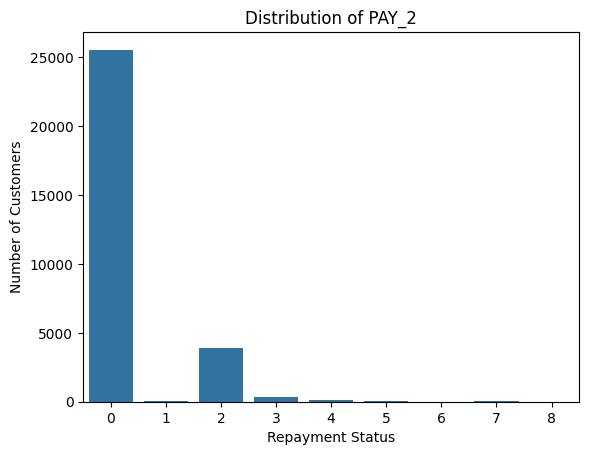

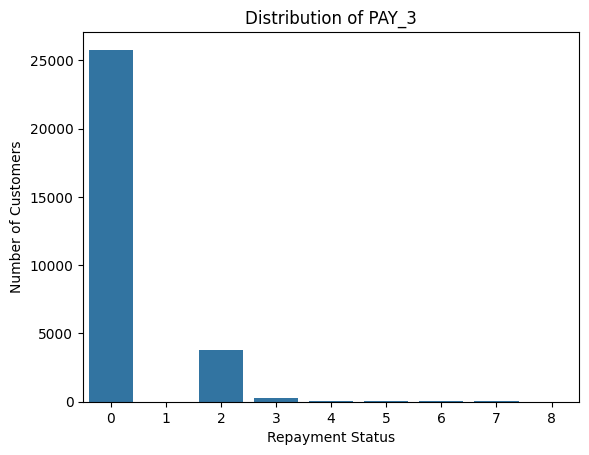

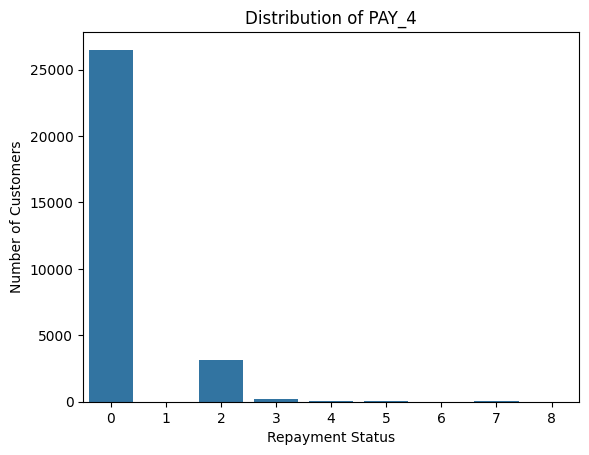

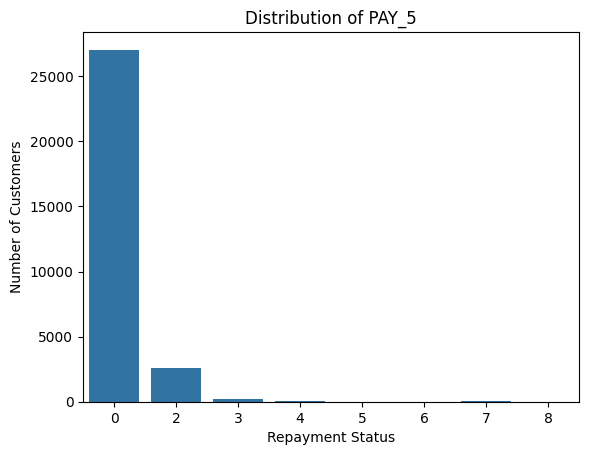

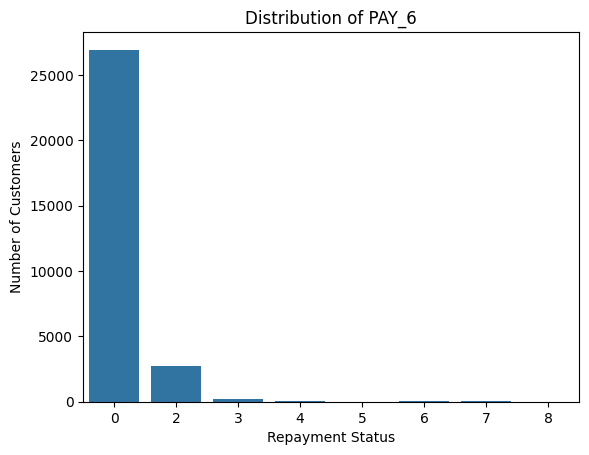

In [333]:
pay_status = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in pay_status:
    sns.countplot(x=col, data=df, )
    plt.title(f'Distribution of {col}')
    plt.xlabel('Repayment Status')
    plt.ylabel('Number of Customers')
    plt.show()


# BIVARIATE ANALYSIS

In [334]:
df = df.drop('AGE_GROUP', axis=1)


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

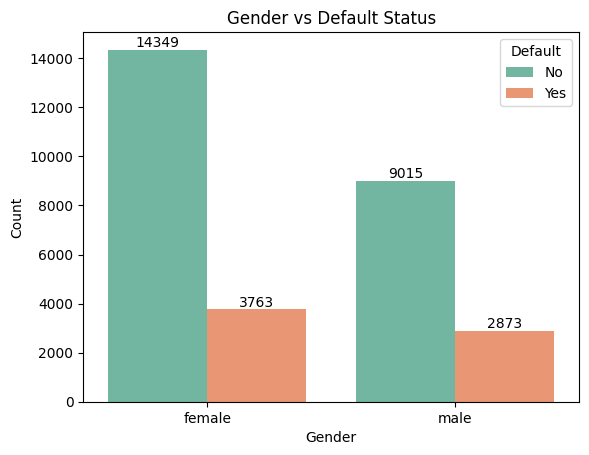

In [336]:
df["sex_temp"]=df['SEX'].map({2:'female',1:"male"})

ax=sns.countplot(x='sex_temp', hue='default payment next month', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender vs Default Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()


In [337]:
pd.crosstab(df['sex_temp'], df['default payment next month'], normalize='index') * 100

default payment next month,0,1
sex_temp,,
female,79.223719,20.776281
male,75.832773,24.167227


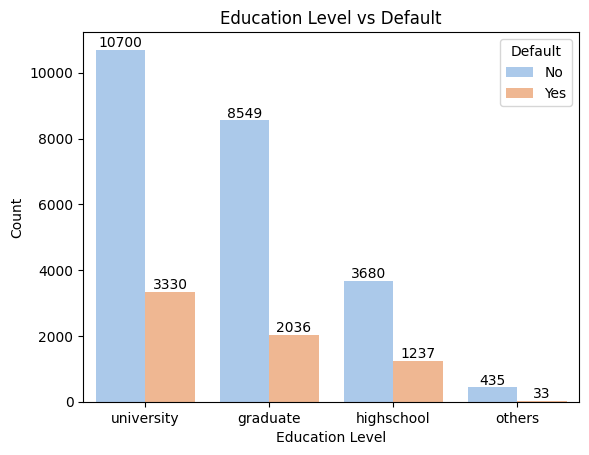

In [338]:
df['education_temp']=df['EDUCATION'].map({1:'graduate',2:'university',3:'highschool',4:'others'})
ax=sns.countplot(x='education_temp', hue='default payment next month', data=df, palette='pastel')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Education Level vs Default')
plt.xlabel('Education Level' )
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()


In [339]:
pd.crosstab(df['education_temp'], df['default payment next month'], normalize='index') * 100



default payment next month,0,1
education_temp,,
graduate,80.765234,19.234766
highschool,74.842384,25.157616
others,92.948718,7.051282
university,76.265146,23.734854


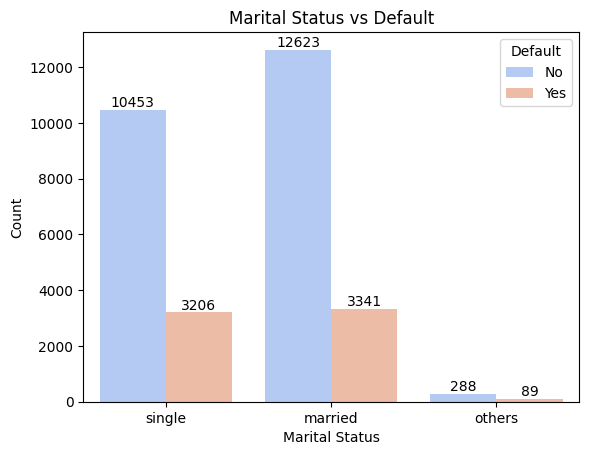

In [340]:
df['marriage_temp']=df['MARRIAGE'].map({1:'single',2:'married',3:'others'})
ax=sns.countplot(x='marriage_temp', hue='default payment next month', data=df, palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Marital Status vs Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
pd.crosstab(df['EDUCATION'], df['default payment next month'], normalize='index') * 100
plt.show()



In [341]:
df['married'] = df['MARRIAGE'].apply(lambda x: 1 if x == 1 else 0)
df['not_married'] = df['MARRIAGE'].apply(lambda x: 1 if x in [2, 3] else 0)


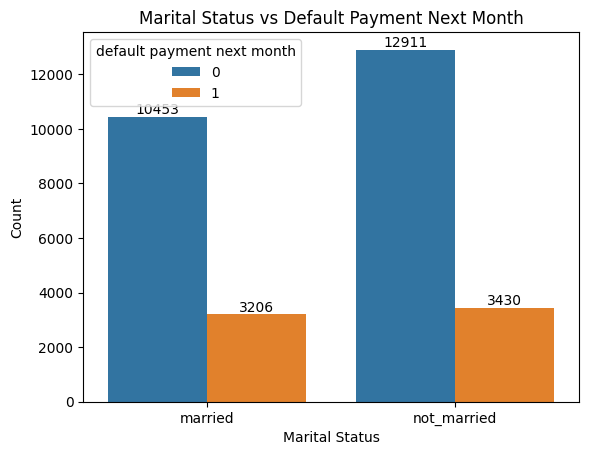

In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt into long format for easy plotting
df_melted = df.melt(
    id_vars='default payment next month',
    value_vars=['married', 'not_married'],
    var_name='Marital_Status',
    value_name='Flag'
)

ax=sns.countplot(
    x='Marital_Status',
    hue='default payment next month',
    data=df_melted[df_melted['Flag'] == 1]
)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Marital Status vs Default Payment Next Month")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


In [343]:
pd.crosstab(
    index=[df['married'], df['not_married']],
    columns=df['default payment next month'],
    normalize='index'
) * 100


,default payment next month,0,1
married,not_married,,
0,1,79.009853,20.990147
1,0,76.528296,23.471704


Marital_Status
Not Married    51.687764
Married        48.312236
Name: proportion, dtype: float64


C:\Users\sjoyw\AppData\Local\Temp\ipykernel_16932\3699586335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(


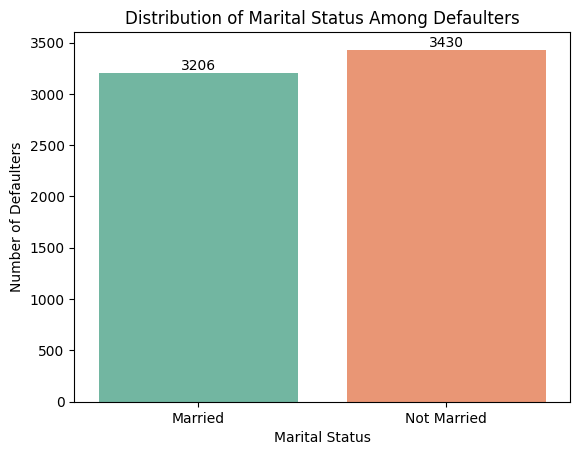

In [344]:
df['Marital_Status'] = df['MARRIAGE'].apply(lambda x: 'Married' if x == 1 else 'Not Married')
defaulters = df[df['default payment next month'] == 1]
marriage_counts = defaulters['Marital_Status'].value_counts(normalize=True) * 100
print(marriage_counts)


ax=sns.countplot(
    x='Marital_Status',
    data=defaulters,
    palette='Set2'
)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribution of Marital Status Among Defaulters")
plt.xlabel("Marital Status")
plt.ylabel("Number of Defaulters")
plt.show()


In [345]:
pd.crosstab(df['marriage_temp'], df['default payment next month'], normalize='index') * 100


default payment next month,0,1
marriage_temp,,
married,79.071661,20.928339
others,76.392573,23.607427
single,76.528296,23.471704


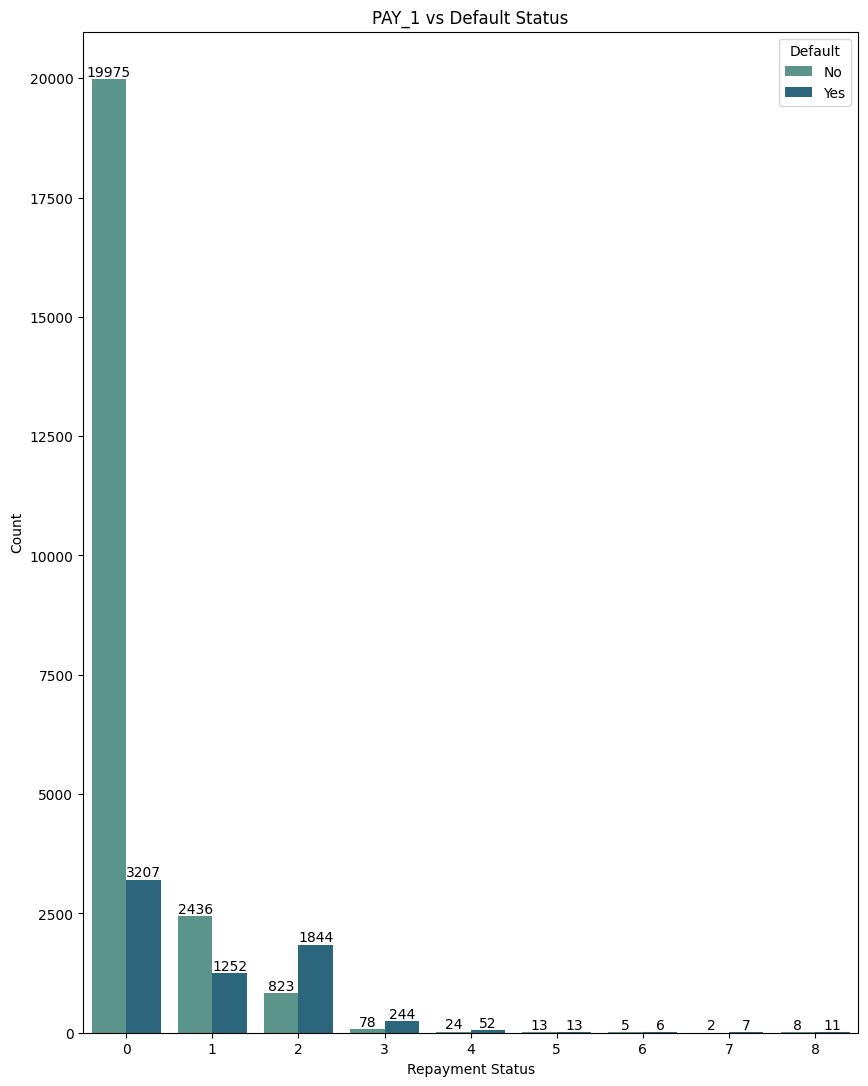

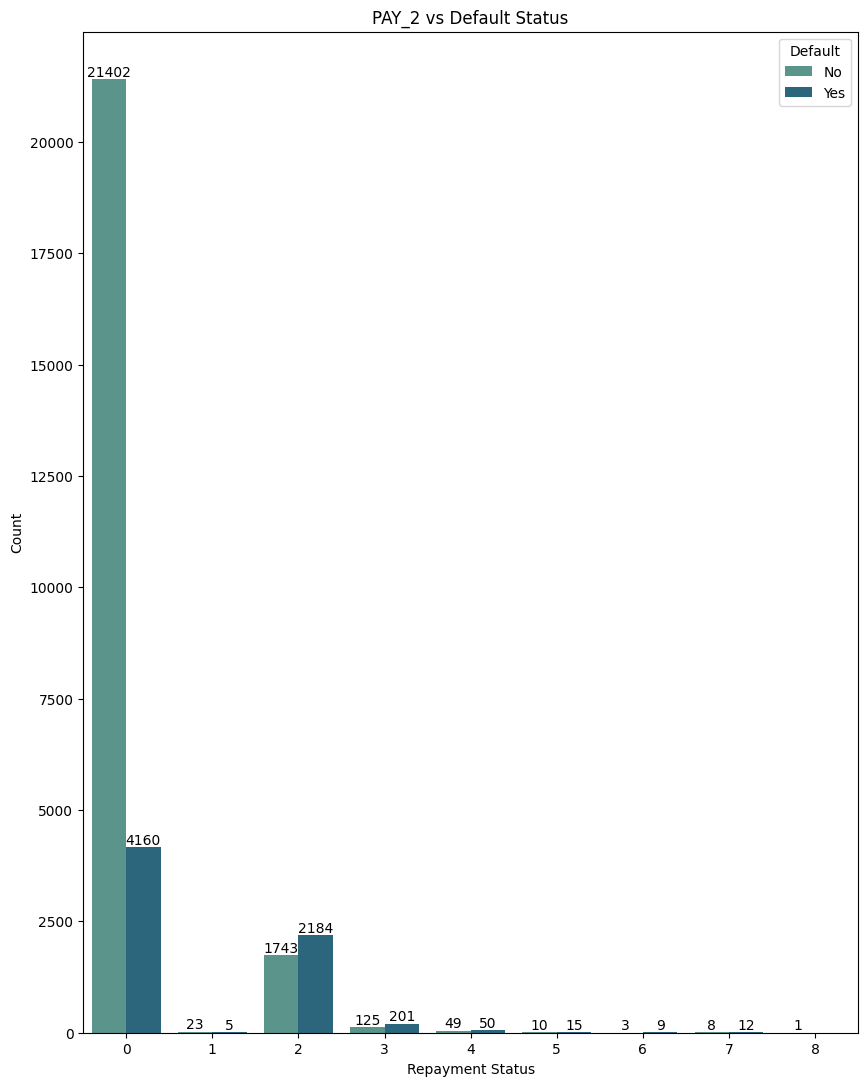

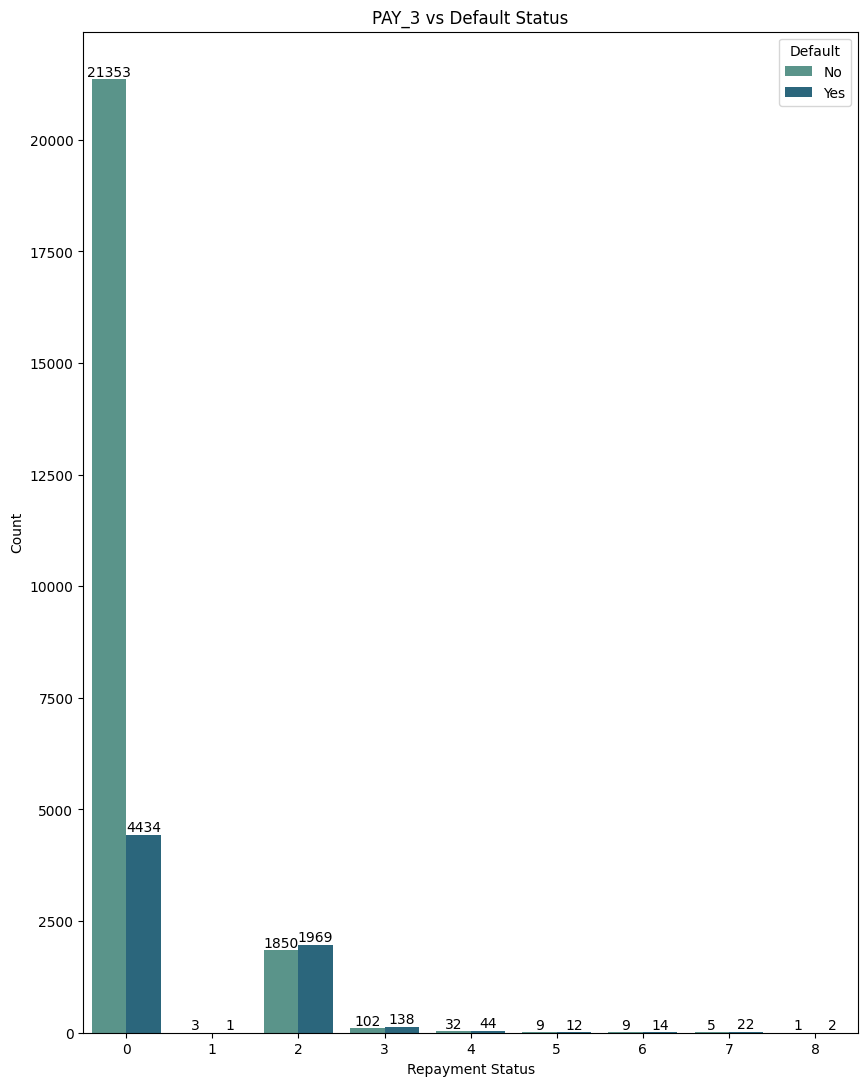

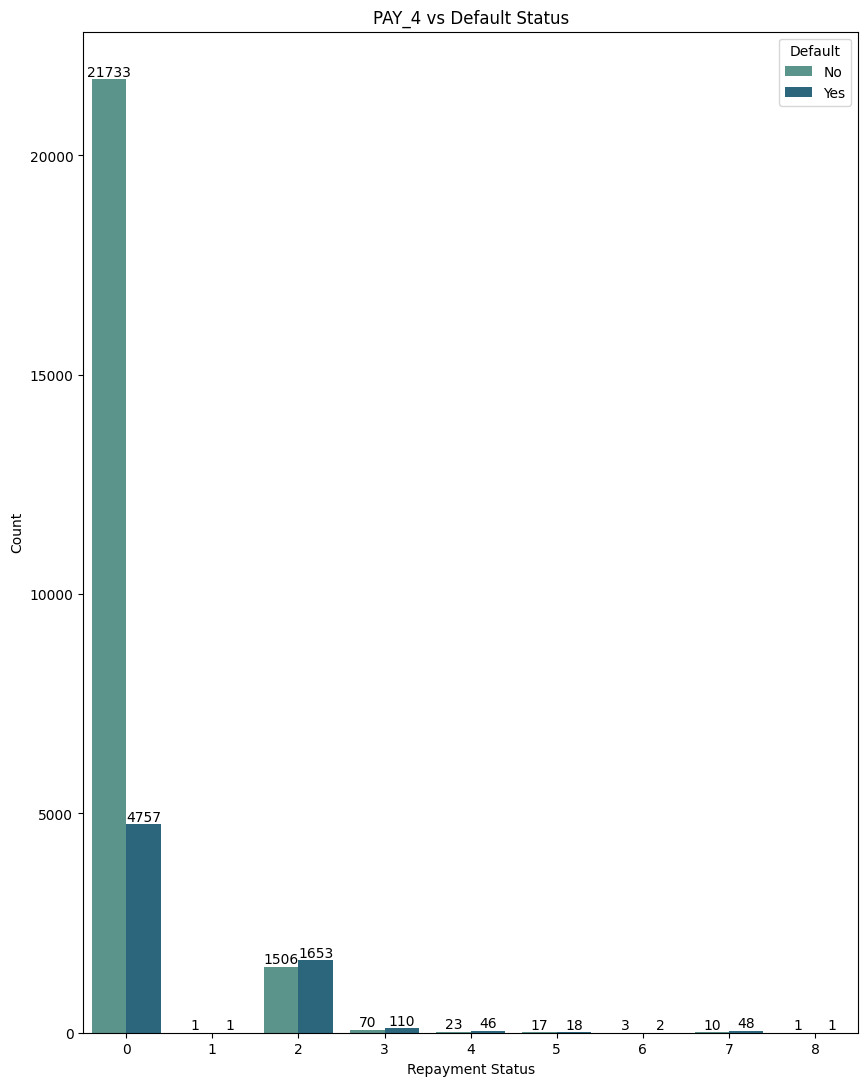

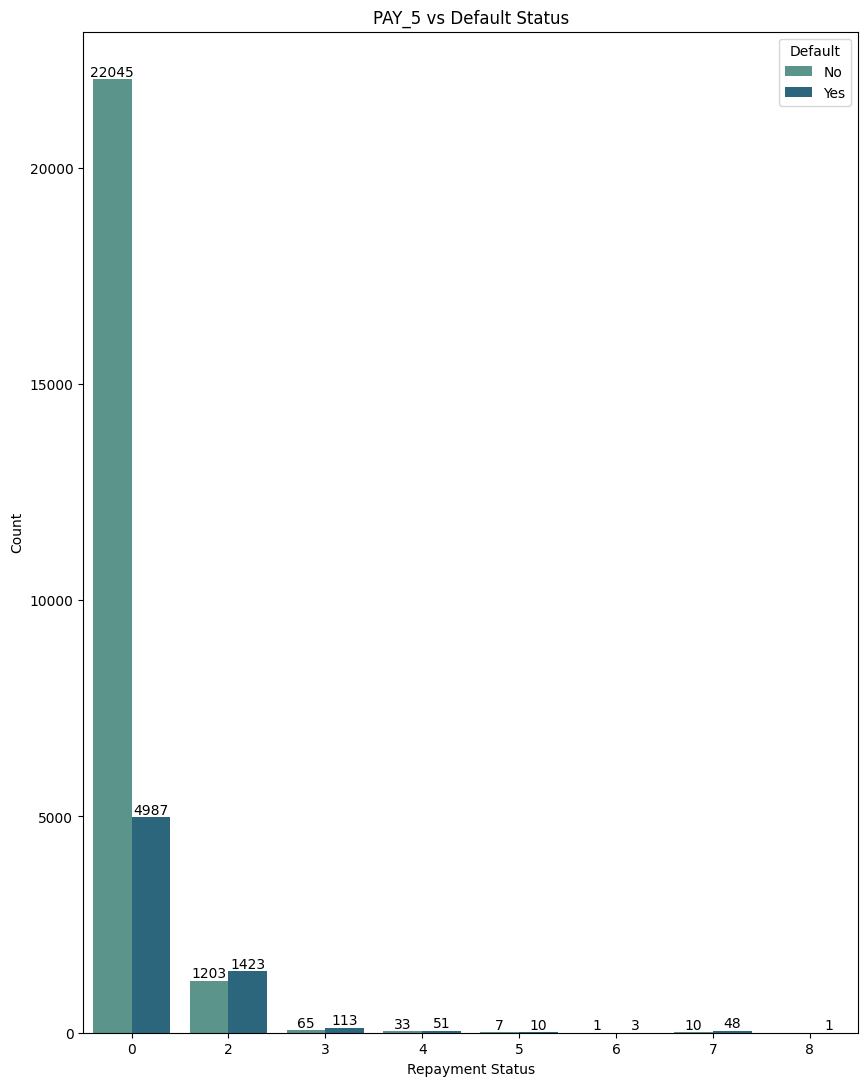

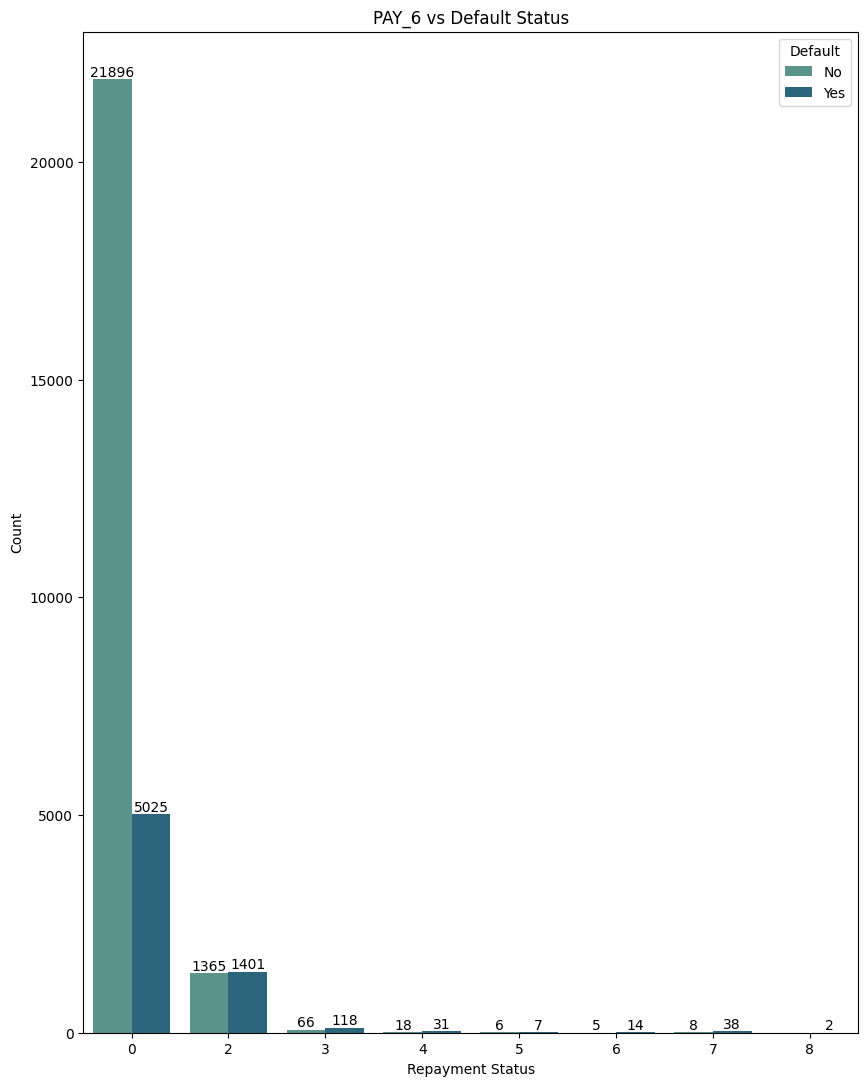

In [346]:

pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in pay_cols:
    plt.figure(figsize=(10,13))
    ax=sns.countplot(x=col, hue='default payment next month', data=df, palette='crest')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'{col} vs Default Status')
    plt.xlabel('Repayment Status')
    plt.ylabel('Count')
    plt.legend(title='Default', labels=['No', 'Yes'])
    plt.show()


In [347]:
for i in pay_cols:
    print(pd.crosstab(df[i], df['default payment next month'], normalize='index') * 100,'\n')

default payment next month          0          1
PAY_1                                           
0                           86.165991  13.834009
1                           66.052061  33.947939
2                           30.858643  69.141357
3                           24.223602  75.776398
4                           31.578947  68.421053
5                           50.000000  50.000000
6                           45.454545  54.545455
7                           22.222222  77.777778
8                           42.105263  57.894737 

default payment next month           0          1
PAY_2                                            
0                            83.725843  16.274157
1                            82.142857  17.857143
2                            44.385027  55.614973
3                            38.343558  61.656442
4                            49.494949  50.505051
5                            40.000000  60.000000
6                            25.000000  75.000000
7        

people who pay after the 1st 2 months have high risk of default

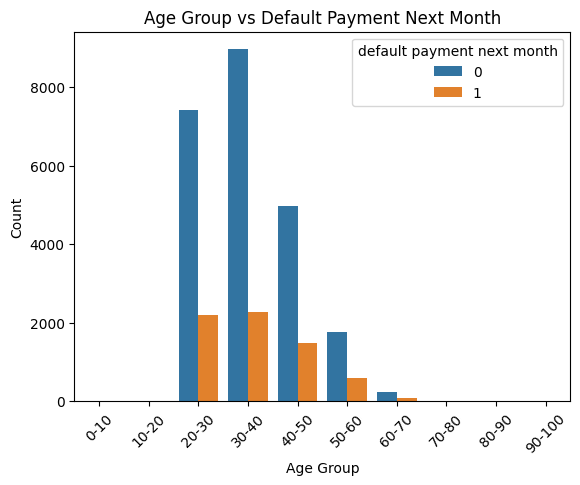

In [348]:
bins = range(0, 101, 10)
labels = [f"{i}-{i+10}" for i in range(0, 100, 10)]

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)


sns.countplot(x='AGE_GROUP', hue='default payment next month', data=df, )
plt.title("Age Group vs Default Payment Next Month")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



In [349]:
pd.crosstab(df['AGE_GROUP'],df['default payment next month'],normalize='index')*100

default payment next month,0,1
AGE_GROUP,,
20-30,77.157413,22.842587
30-40,79.747286,20.252714
40-50,77.026609,22.973391
50-60,75.138830,24.861170
60-70,71.656051,28.343949
70-80,72.000000,28.000000


retired or senior citizens have a higher risk of default than other age grps

In [350]:
df['LIMIT_BAL'].value_counts()

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

In [351]:
bins = range(0, 1000001 , 50000)
labels = [f"{i}-{i+50000}" for i in range(0, 1000000, 50000)]
df['BALANCE_GROUP'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels, right=False)

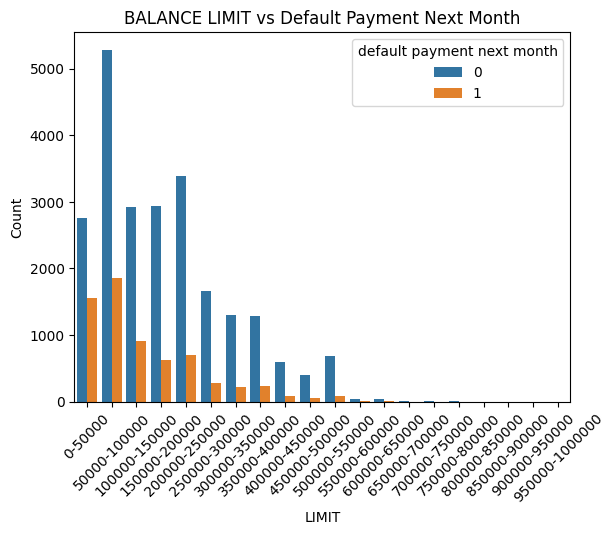

<Figure size 2500x1000 with 0 Axes>

In [352]:
sns.countplot(x='BALANCE_GROUP', hue='default payment next month', data=df, )
plt.title("BALANCE LIMIT vs Default Payment Next Month")
plt.xlabel("LIMIT")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.figure(figsize=(25,10))
plt.show()

In [353]:
pd.crosstab(df['BALANCE_GROUP'],df['default payment next month'],normalize='index')*100

default payment next month,0,1
BALANCE_GROUP,,
0-50000,63.929483,36.070517
50000-100000,73.987953,26.012047
100000-150000,76.302083,23.697917
150000-200000,82.387640,17.612360
200000-250000,82.880235,17.119765
250000-300000,85.230769,14.769231
300000-350000,85.611511,14.388489
350000-400000,84.666226,15.333774
400000-450000,87.847731,12.152269


people with <50k limit balance has more% of defaulters in them

In [354]:
df['BILL_AMT1'].value_counts()

BILL_AMT1
0         2008
390        244
780         76
326         72
316         63
          ... 
70887        1
386301       1
15376        1
253286       1
46990        1
Name: count, Length: 22723, dtype: int64

In [355]:
'''bins = range(0, 100001 , 5000)
labels = [f"{i}-{i+5000}" for i in range(0, 100000, 5000)]
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for i in bill_cols:
    df[i+"temp"] = pd.cut(df['BILL_AMT1'], bins=bins, labels=labels, right=False)
    sns.countplot(x='bill1', hue='default payment next month', data=df, )
    plt.title(f"{i+'temp'} vs Default Payment Next Month")
    plt.xlabel("amount")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.figure(figsize=(25,10))
    plt.show()'''

'bins = range(0, 100001 , 5000)\nlabels = [f"{i}-{i+5000}" for i in range(0, 100000, 5000)]\nbill_cols = [\'BILL_AMT1\',\'BILL_AMT2\',\'BILL_AMT3\',\'BILL_AMT4\',\'BILL_AMT5\',\'BILL_AMT6\']\nfor i in bill_cols:\n    df[i+"temp"] = pd.cut(df[\'BILL_AMT1\'], bins=bins, labels=labels, right=False)\n    sns.countplot(x=\'bill1\', hue=\'default payment next month\', data=df, )\n    plt.title(f"{i+\'temp\'} vs Default Payment Next Month")\n    plt.xlabel("amount")\n    plt.ylabel("Count")\n    plt.xticks(rotation=45)\n    plt.figure(figsize=(25,10))\n    plt.show()'

In [356]:

bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
delay_cols = [f'PAY_{i}' for i in range(1, 7)] 


df['avg_bill'] = df[bill_cols].mean(axis=1)
df['avg_payment'] = df[pay_cols].mean(axis=1)



df[['avg_bill', 'avg_payment']].head()


,avg_bill,avg_payment
0,1284.000000,114.833333
1,2846.166667,833.333333
2,16942.166667,1836.333333
3,38555.666667,1398.000000
4,18223.166667,9841.500000


In [357]:
df['avg_bill'].min()

np.float64(-56043.166666666664)

In [358]:
df['avg_bill'].max()

np.float64(877313.8333333334)

In [359]:
df['bill_category'] = pd.qcut(df['avg_bill'], q=4, labels=['Low', 'Moderate', 'High', 'Very High'])
df['pay_category'] = pd.qcut(df['avg_payment'], q=4, labels=['Low', 'Moderate', 'High', 'Very High'])


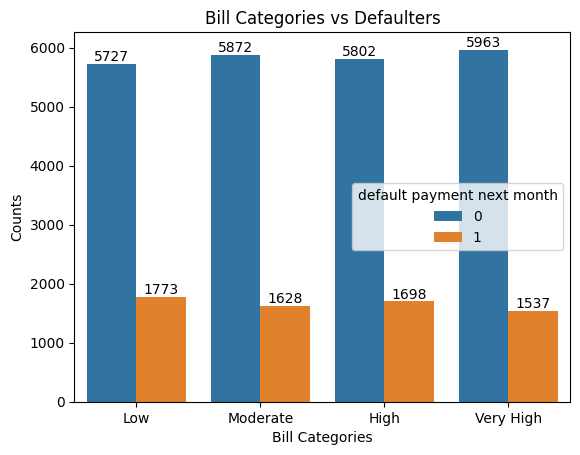

In [360]:
ax=sns.countplot(x='bill_category',hue='default payment next month',data=df,)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Bill Categories vs Defaulters')
plt.xlabel("Bill Categories")
plt.ylabel('Counts')
plt.show()

In [361]:
pd.crosstab(df['bill_category'],df['default payment next month'],normalize='index')*100

default payment next month,0,1
bill_category,,
Low,76.360000,23.640000
Moderate,78.293333,21.706667
High,77.360000,22.640000
Very High,79.506667,20.493333


 low bill category has a higher % of default although it is minute we can see similar trends for low limit balance and low payments

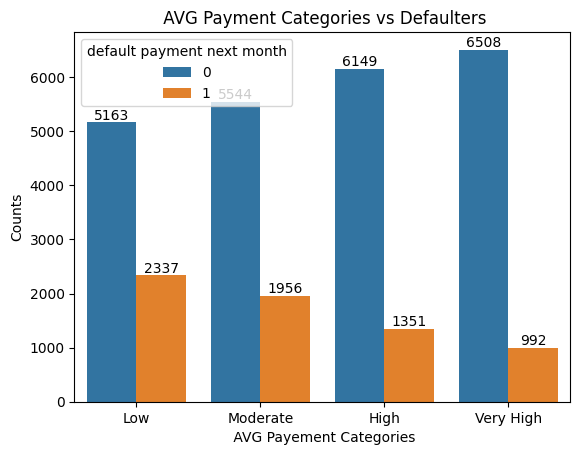

In [362]:
ax=sns.countplot(x='pay_category',hue='default payment next month',data=df,)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title(' AVG Payment Categories vs Defaulters')
plt.xlabel(" AVG Payement Categories")
plt.ylabel('Counts')
plt.show()

In [363]:
pd.crosstab(df['pay_category'],df['default payment next month'],normalize='index')*100

default payment next month,0,1
pay_category,,
Low,68.840000,31.160000
Moderate,73.920000,26.080000
High,81.986667,18.013333
Very High,86.773333,13.226667


Low payment has a significanlty high % of default than others

## Multivariate Analysis

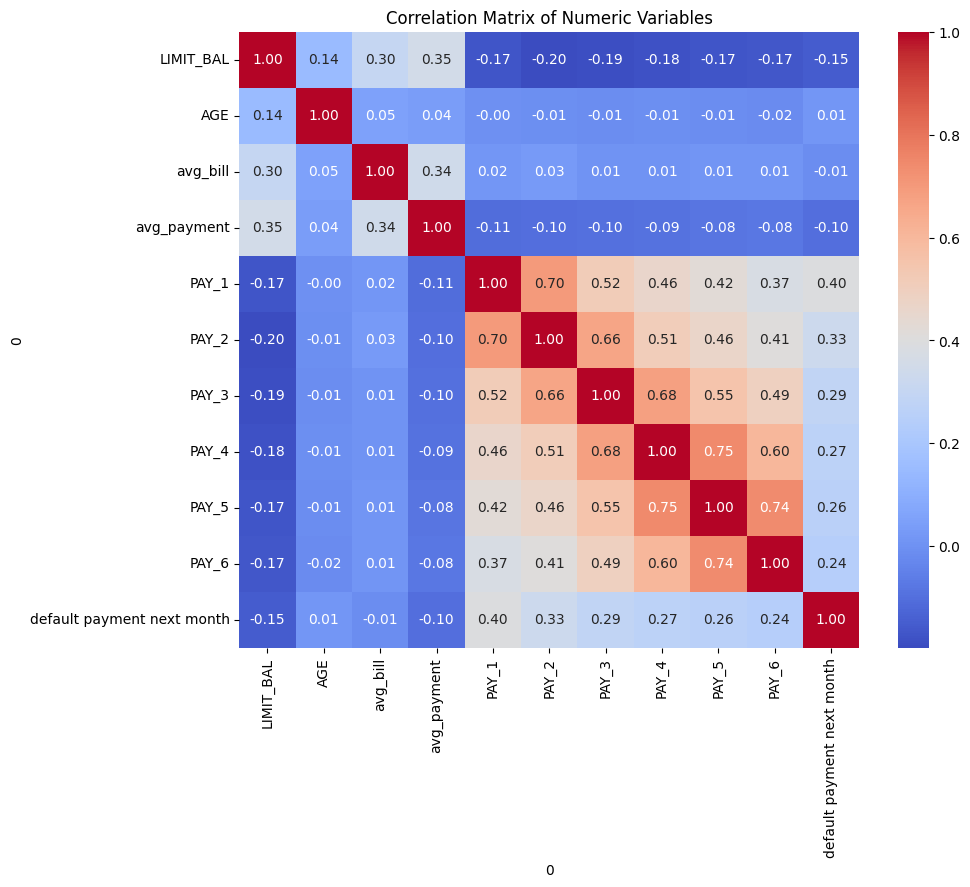

In [364]:
num_cols = ['LIMIT_BAL','AGE','avg_bill','avg_payment','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


we can infer from the matrix if one payment is delayed the payment for the next month also delays and this cycle continues

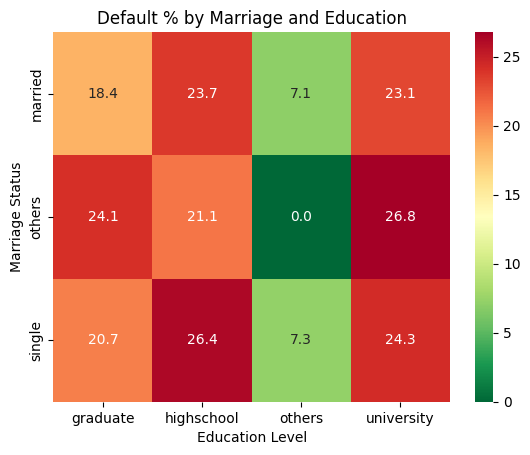

In [365]:
pivot = df.pivot_table(values='default payment next month', 
                       index='marriage_temp', 
                       columns='education_temp', 
                       aggfunc='mean') * 100

sns.heatmap(pivot, annot=True, fmt=".1f", cmap='RdYlGn_r')
plt.title('Default % by Marriage and Education')
plt.ylabel('Marriage Status')
plt.xlabel('Education Level')
plt.show()


C:\Users\sjoyw\AppData\Local\Temp\ipykernel_16932\1245633720.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='default payment next month', index='AGE_GROUP', columns='sex_temp', aggfunc='mean') * 100


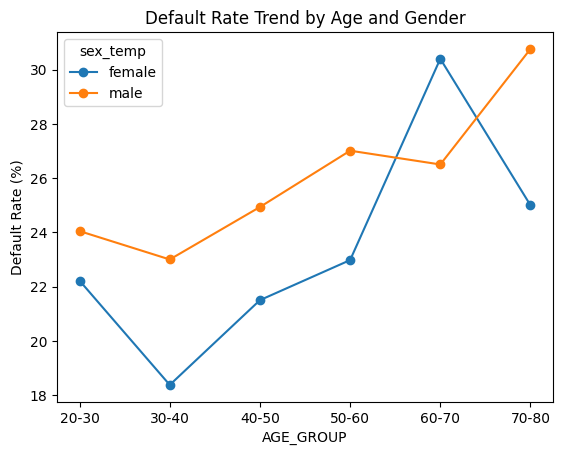

In [366]:
pivot = df.pivot_table(values='default payment next month', index='AGE_GROUP', columns='sex_temp', aggfunc='mean') * 100
pivot.plot(marker='o')
plt.title('Default Rate Trend by Age and Gender')
plt.ylabel('Default Rate (%)')
plt.show()

In [367]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'sex_temp', 'education_temp',
       'marriage_temp', 'married', 'not_married', 'Marital_Status',
       'AGE_GROUP', 'BALANCE_GROUP', 'avg_bill', 'avg_payment',
       'bill_category', 'pay_category'],
      dtype='object', name=0)

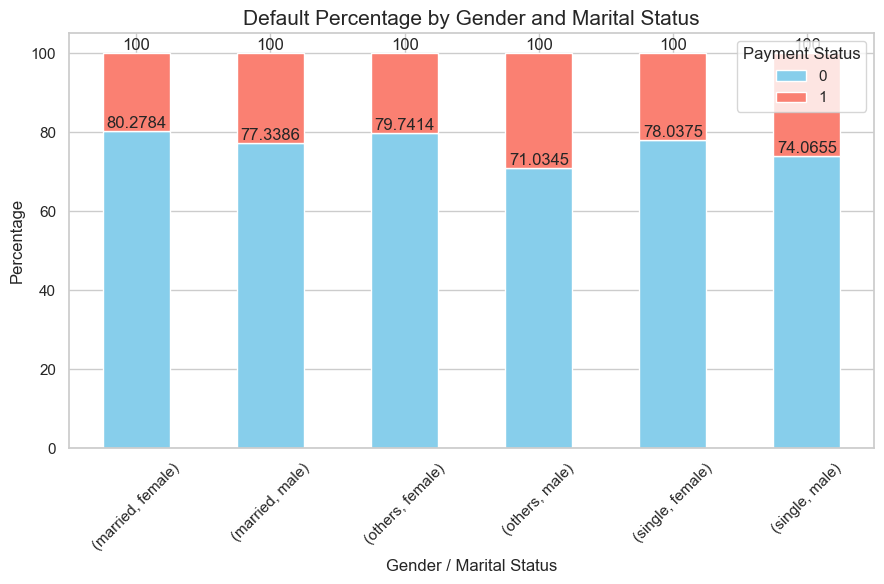

In [ ]:
table = pd.crosstab(
    [df['marriage_temp'], df['sex_temp']],
    df['default payment next month'],
    normalize='index'
) * 100
ax=table.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    figsize=(9,6)
)
ax.bar_label(ax.containers[0])

plt.title("Default Percentage by Gender and Marital Status", fontsize=15)
plt.ylabel("Percentage")
plt.xlabel("Gender / Marital Status")
plt.legend(title="Payment Status", loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

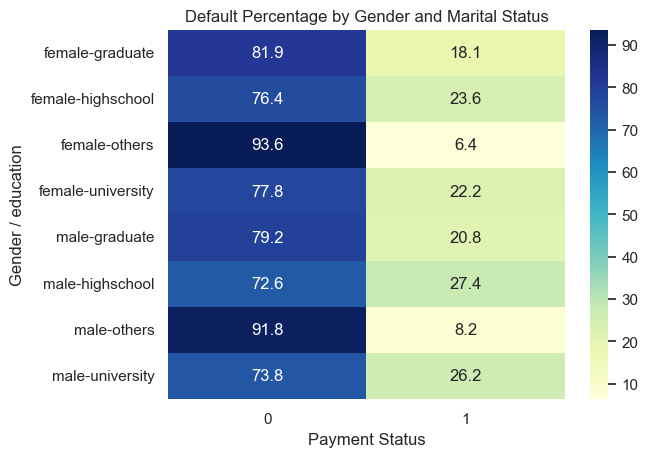

In [ ]:
pivot = pd.crosstab(
    index=[df['sex_temp'], df['education_temp']],
    columns=df['default payment next month'],
    normalize='index'
) * 100

sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Default Percentage by Gender and education")
plt.ylabel("Gender / education")
plt.xlabel("Payment Status")
plt.show()



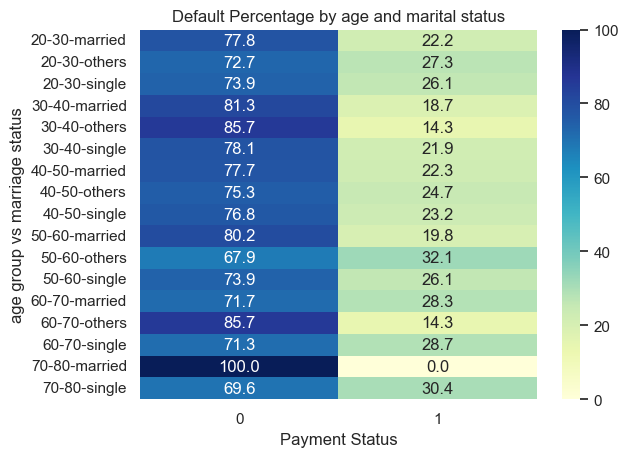

In [384]:
pivot = pd.crosstab(
    index=[df['AGE_GROUP'], df['marriage_temp']],
    columns=df['default payment next month'],
    normalize='index'
) * 100

sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Default Percentage by age and marital status")
plt.ylabel("age group vs marriage status")
plt.xlabel("Payment Status")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

for gender in df['Gender'].unique():
    gender_df = df[df['Gender'] == gender]
    counts = pd.crosstab(gender_df['Marital_Status'], gender_df['Default'])
    fig, axes = plt.subplots(1, len(counts), figsize=(10, 4))
    fig.suptitle(f"Default Breakdown by Marital Status ({gender})", fontsize=14)

    for i, status in enumerate(counts.index):
        counts.loc[status].plot(
            kind='pie',
            autopct='%1.1f%%',
            ax=axes[i],
            startangle=90,
            title=status
        )
        axes[i].set_ylabel("")
    plt.show()


## Feature Scaling And Feature Encoding

In [ ]:
# Average features
df['avg_bill_amt'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['avg_pay_amt'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)

# Payment-to-bill ratio (financial discipline)
df['payment_ratio'] = df['avg_pay_amt'] / (df['avg_bill_amt'] + 1)

# Credit utilization
df['utilization_rate'] = df['avg_bill_amt'] / df['LIMIT_BAL']

# Payment delay trend (increase in delays over time)
pay_cols = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['delay_trend'] = df[pay_cols].mean(axis=1)


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'sex_temp', 'education_temp',
       'marriage_temp', 'AGE_GROUP', 'BALANCE_GROUP', 'avg_bill',
       'avg_payment', 'bill_category', 'pay_category', 'avg_bill_amt',
       'avg_pay_amt', 'payment_ratio', 'utilization_rate', 'delay_trend'],
      dtype='object', name=0)

In [ ]:
cols_to_drop = [
    'ID',
    'sex_temp', 'education_temp', 'marriage_temp',
    
    'AGE_GROUP', 'BALANCE_GROUP','bill_category', 'pay_category'
    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')



In [ ]:
df.drop(columns='BILL_AMT1', inplace=True, errors='ignore')

In [ ]:
df['pay_category'] = df['pay_category'].map({'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4})


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,avg_bill,avg_payment,pay_category,avg_bill_amt,avg_pay_amt,payment_ratio,utilization_rate,delay_trend
0,20000,2,2,1,24,2,2,0,0,0,0,1,1284.000000,114.833333,1,1284.000000,114.833333,0.089364,0.064200,0.666667
1,120000,2,2,2,26,0,2,0,0,0,2,1,2846.166667,833.333333,1,2846.166667,833.333333,0.292689,0.023718,0.666667
2,90000,2,2,2,34,0,0,0,0,0,0,0,16942.166667,1836.333333,2,16942.166667,1836.333333,0.108382,0.188246,0.000000
3,50000,2,2,1,37,0,0,0,0,0,0,0,38555.666667,1398.000000,2,38555.666667,1398.000000,0.036258,0.771113,0.000000
4,50000,1,2,1,57,0,0,0,0,0,0,0,18223.166667,9841.500000,4,18223.166667,9841.500000,0.540025,0.364463,0.000000


In [ ]:
# Gender
df['is_male'] = np.where(df['SEX'] == 1, 1, 0)
df['is_female'] = np.where(df['SEX'] == 2, 1, 0)

# Marriage
df['is_married'] = np.where(df['MARRIAGE'] == 1, 1, 0)
df['is_single'] = np.where(df['MARRIAGE'] == 2, 1, 0)
df['is_other_marriage'] = np.where(df['MARRIAGE'] == 3, 1, 0)

# Education
df['is_graduate'] = np.where(df['EDUCATION'] == 1, 1, 0)
df['is_university'] = np.where(df['EDUCATION'] == 2, 1, 0)
df['is_highschool'] = np.where(df['EDUCATION'] == 3, 1, 0)
df['is_other_education'] = np.where(df['EDUCATION'] > 3, 1, 0)


In [ ]:
df.drop(columns=['SEX', 'MARRIAGE', 'EDUCATION'], inplace=True)


In [ ]:
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,avg_bill,...,delay_trend,is_male,is_female,is_married,is_single,is_other_marriage,is_graduate,is_university,is_highschool,is_other_education
0,20000,24,2,2,0,0,0,0,1,1284.000000,...,0.666667,0,1,1,0,0,0,1,0,0
1,120000,26,0,2,0,0,0,2,1,2846.166667,...,0.666667,0,1,0,1,0,0,1,0,0
2,90000,34,0,0,0,0,0,0,0,16942.166667,...,0.000000,0,1,0,1,0,0,1,0,0
3,50000,37,0,0,0,0,0,0,0,38555.666667,...,0.000000,0,1,1,0,0,0,1,0,0
4,50000,57,0,0,0,0,0,0,0,18223.166667,...,0.000000,1,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop(columns=['default payment next month']))
df_scaled = pd.DataFrame(scaled, columns=df.drop(columns=['default payment next month']).columns)
df_scaled['default payment next month'] = df['default payment next month'].values



In [ ]:
df['pay_category']=pd.to_numeric(df['pay_category'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   AGE                         30000 non-null  int64  
 2   PAY_1                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   default payment next month  30000 non-null  int64  
 9   avg_bill                    30000 non-null  float64
 10  avg_payment                 30000 non-null  float64
 11  pay_category                30000 non-null  int64  
 12  avg_bill_amt                30000 non-null  float64
 13  avg_pay_amt                 300

In [ ]:
df_scaled.to_csv('credit_default_scaled.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   AGE                         30000 non-null  int64  
 2   PAY_1                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   default payment next month  30000 non-null  int64  
 9   avg_bill                    30000 non-null  float64
 10  avg_payment                 30000 non-null  float64
 11  pay_category                30000 non-null  int64  
 12  avg_bill_amt                30000 non-null  float64
 13  avg_pay_amt                 300

In [ ]:
df.to_csv("credit_card_default_features.csv", index=False)
print("✅ credit_card_default_features.csv saved successfully!")

✅ credit_card_default_features.csv saved successfully!
